***Vorlesung 'Syntax natürlicher Sprachen', WS 2019/20***

---
# Übung 8

#### Bitte beachten:  
- In diesem Notebook wurden die PCFG-Grammatiken des **Stanford-Parsers** zur Generierung linguistischer Analysen verwendet (CFG-Syntaxbäume sowie davon abgeleitete Dependenzanalysen).
- Die *Ausführung der entsprechenden Codezellen* ist entsprechend ***nicht notwendig***.
- Falls der ***Stanford-Parser nicht installiert*** ist, ist eine erfolgreiche Ausführung nicht möglich und die **interaktiven Aufgaben** sollte zur Bearbeitung ***einzeln ausgeführt*** werden (statt `Run All`).
- In einem **Zusatz-Notebook** (`08-notebook-spacy.ipynb`) sind die entsprechenden Analysen mit spaCy durchgeführt (Dependency Parsing).

In [1]:
from exercises_8 import *
from questions import aufgabe

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from nltk.parse.stanford import StanfordParser, StanfordDependencyParser
import os

PATH_TO_CORE = os.getenv("HOME") + os.sep + os.path.join("nltk_data", "stanford-corenlp-full-2018-10-05")
PATH_TO_GER_MODEL = os.getenv("HOME") + os.sep + os.path.join("nltk_data", "stanford-models-2018-10-05")

jar = os.path.join(PATH_TO_CORE, "stanford-corenlp-3.9.2.jar")
model = os.path.join(PATH_TO_CORE,"stanford-corenlp-3.9.2-models.jar")
ger_model = os.path.join(PATH_TO_GER_MODEL, "stanford-german-corenlp-2018-10-05-models.jar")

parser = StanfordParser(jar, model, model_path="edu/stanford/nlp/models/lexparser/" + "englishPCFG.ser.gz")
ger_parser = StanfordParser(jar, ger_model, model_path="edu/stanford/nlp/models/lexparser/" + "germanPCFG.ser.gz")

dep_parser = StanfordDependencyParser(jar, model, model_path="edu/stanford/nlp/models/lexparser/" + "englishPCFG.ser.gz")

---
### Aufgabe 1: Satzklassifikation

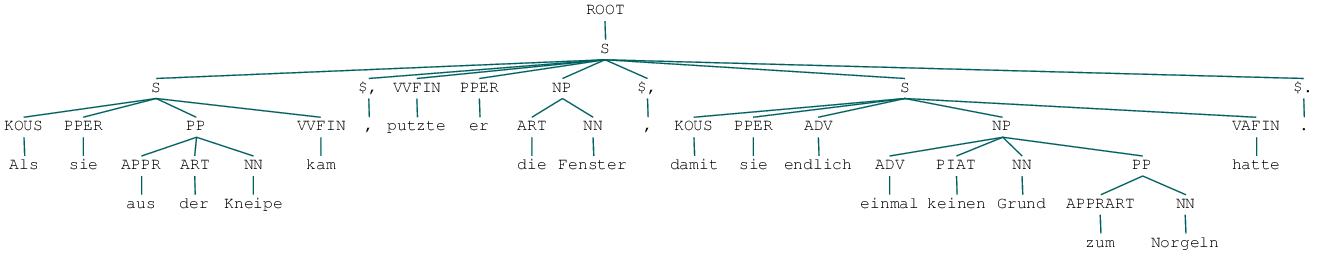

In [3]:
tree_list = list(ger_parser.raw_parse('Als sie aus der Kneipe kam, putzte er die Fenster, damit sie endlich einmal keinen Grund zum Nörgeln hatte.'))
display(tree_list[0])

#### Klassifizieren Sie die Nebensätze des obigen Satzes nach syntaktischen, semantischen und formalen Gesichtspunkten.

- *Als sie aus der Kneipe kam, putzte er die Fenster, damit sie endlich einmal keinen Grund zum Nörgeln hatte.*

#### Beantworten Sie zu diesem Satz die folgenden Fragen.

In [3]:
aufgabe(blatt8_1)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Satzteile sind Nebensätze?</h4>'), HTM…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Um was für einen Satz handelt es sich syntakti…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Was ist <i>als sie ...</i> semantisch für ein …

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Aussagen stimmen für den Teilsatz <i>a…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Um was für einen Satz handelt es sich syntakti…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Was ist <i>damit sie ...</i> semantisch für ei…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Aussagen stimmen für den Teilsatz <i>d…

---
## Aufgabe 2: Stellungsfeldermodell

#### Zerlegen Sie den folgenden Satz in Satzklammern und Stellungsfelder. Analysieren Sie sowohl den Haupt- als auch den Nebensatz auf diese Weise.

- *Der kleine Junge hat heute das Buch gelesen, das ihm sein Vater zu Weihnachten schenkte.*

#### Beantworten Sie folgende Fragen zum Hauptsatz:

In [4]:
aufgabe(blatt8_2a)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Wörter stehen im Vorfeld?</h4>'), HTML…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Wörter sind Teil der linken Satzklamme…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Wörter stehen im Mittelfeld?</h4>'), H…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Wörter sind Teil der rechten Satzklamm…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Aussage über das Nachfeld des Hauptsatze…

#### Beantworten Sie nun die folgenden Fragen zum Nebensatz.

In [5]:
aufgabe(blatt8_2b)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Wörter stehen im Vorfeld?</h4>'), HTML…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Wörter sind Teil der linken Satzklamme…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Wörter stehen im Mittelfeld?</h4>'), H…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Wörter sind Teil der rechten Satzklamm…

---
## Aufgabe 3: Konstituenten im Vorfeld

#### Vergleichen Sie die folgenden Beispielsätze. Wie erklären Sie die unterschiedliche Akzeptabilität dieser Sätze?

- *&ast;Peter gesungen hat ein Lied.*
- *Ein Lied gesungen hat Peter.*

#### Beantworten Sie hierzu die folgenden Fragen.

In [6]:
aufgabe(blatt8_3)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Identifizieren Sie das Vorfeld des ersten und…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wann ist die Konstituentenverbindung <i>Satzg…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche übergeordnete Konstituente läßt sich im …

---
## Aufgabe 4: Stellungsregeln

#### Erläutern Sie, warum die folgenden Sätze nur bedingt akzeptabel sind:
1. *? Ich weiß, dass Peter auf den Tisch die Lampe stellt.*
1. *? Ich weiß, dass Peter 100 Rosen seiner Freundin geschenkt hat.*
1. *? Ich weiß, dass Peter ihr sie geschenkt hat.*
1. *? Ich weiß, dass Peter immer zu spät halt kommt.*

#### Geben Sie für jede der folgenden Stellungsregeln des Deutschen an, welcher der obigen Sätze diese verletzt:

In [7]:
aufgabe(blatt8_4)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">\'Präpositionale Objekte stehen in Verbendsät…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">\'Die Abfolgeregularität für Personalpronomina…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">\'Im unmarkierten Fall steht die Modalpartikel …

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">\'Die (markierte) Abfolge ›Subjekt vor Akkusati…

--- 
## Aufgabe 5: Syntaxregeln komplexer Sätze
#### Geben Sie zu den folgenden Outputs des Stanford-Parsers (trainiert auf Penn-Treebank bzw. mit UD-Schema) anhand der Ableitungsbäume die Regeln der jeweils auftretenden komplexen Satzkonstruktionen an (CFG- sowie Dependenzregeln) und benennen Sie den Satz- bzw. Konstruktionstyp. 

---

---
## Aufgabe 5a: 

In [10]:
sentence = "I believe that you win."

In [8]:
aufgabe(blatt8_5a)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was für eine Satzkonstruktion liegt hier vor?</…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Welcher eingebettete Satztyp liegt vor?</h4>')…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Wie läßt sich dieser Satztyp klassifizieren?</…

### *Konstituentenanalyse:*

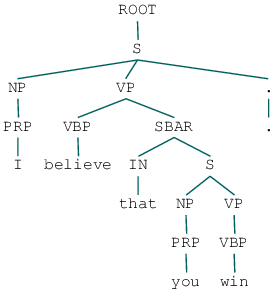

In [11]:
tree_list = list(parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Lösung:*

`VP -> VBP SBAR`

`SBAR -> IN S`

---
### *Dependenzanalyse:*

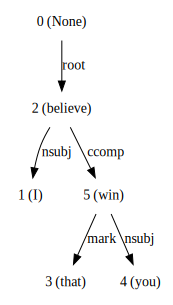

In [11]:
tree_list = list(dep_parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Lösung:*

`VBP -> VBP (ccomp)`

`VBP -> IN (mark)`

---

---
## Aufgabe 5b: 

In [12]:
sentence = "I want to believe."

In [13]:
aufgabe(blatt8_5b)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was für eine Satzkonstruktion liegt hier vor?</…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Welcher eingebettete Satztyp liegt vor?</h4>')…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Wie läßt sich dieser Satztyp klassifizieren?</…

### *Konstituentenanalyse:*

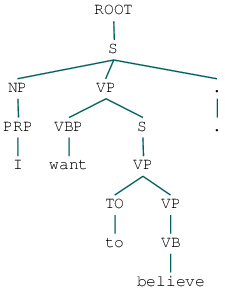

In [15]:
tree_list = list(parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Lösung:*

`VP -> VBP S`

`S -> VP` # Satzregel für subjektlose Infinitivsätze notwendig

`VP -> TO VP`

---
### *Dependenzanalyse:*

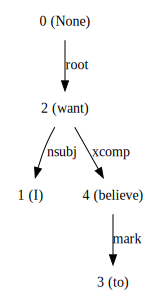

In [14]:
tree_list = list(dep_parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Lösung:*

`VBP -> VB (xcomp)`

`VB -> TO (mark)`

#### Beantworten Sie noch folgende Zusatzfragen zu Aufgabe 5b:

In [15]:
aufgabe(blatt8_5b_zusatz)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Form der Kontrolle liegt hier vor?</h4>'…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Form der Kontrolle liegt in folgendem Sa…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche satzwertigen Funktionen können Infinit…

---

---
## Aufgabe 5c: 

In [16]:
sentence = "the man who knew too much"

In [17]:
aufgabe(blatt8_5c)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was für eine Satzkonstruktion liegt hier vor?</…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Welcher eingebettete Satztyp liegt vor?</h4>')…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Wie läßt sich dieser Satztyp klassifizieren?</…

### *Konstituentenanalyse:*

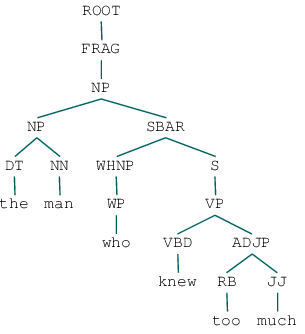

In [20]:
tree_list = list(parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Lösung:*

`NP -> NP SBAR
SBAR -> WHNP S`

`WHNP -> WP
S -> VP
VP -> VBD ADJP`

---
### *Dependenzanalyse:*

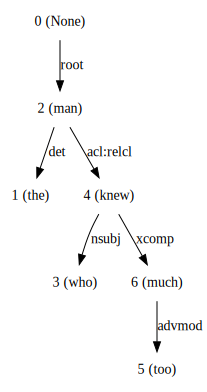

In [18]:
tree_list = list(dep_parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Lösung:*

`NN -> VBP (acl:relcl
VBP -> WP (nsubj)
VBP -> JJ (xcomp)
JJ -> RB (advmod)`

#### Beantworten Sie noch folgende Zusatzfrage zu Aufgabe 5c:

In [19]:
aufgabe(blatt8_5c_zusatz)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Welche Attributsatztypen haben Sie in der Vor…

---

---
## Aufgabe 5d: 

In [20]:
sentence = "They left, but they came back."

In [21]:
aufgabe(blatt8_5d)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was für eine Satzkonstruktion liegt hier vor?</…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Welcher eingebettete Satztyp liegt vor?</h4>')…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Welcher Satztyp kommt vor?</h4>'), HTML(value=…

### *Konstituentenanalyse:*

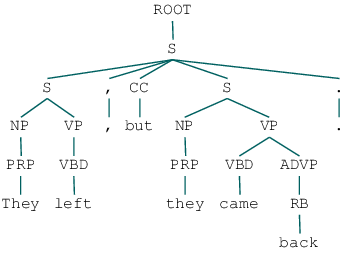

In [25]:
tree_list = list(parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Lösung:*

`S -> S , CC S .`

`, -> ','
. -> '.'
CC -> 'but'`

---
### *Dependenzanalyse:*

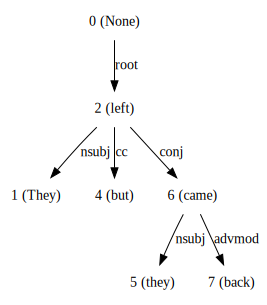

In [22]:
tree_list = list(dep_parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung:*


---

---
## Aufgabe 5e: 

In [23]:
sentence = "This can't be right."

In [24]:
aufgabe(blatt8_5e)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was für eine Satzkonstruktion liegt hier vor?</…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Welche eingebettete Satztyp liegt vor?</h4>'),…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Wie läßt sich dieser Satztyp klassifizieren?</…

### *Konstituentenanalyse:*

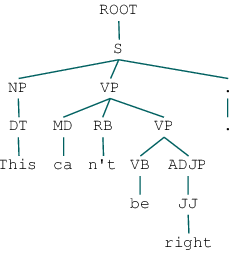

In [29]:
tree_list = list(parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Lösung:*

`VP -> MD RB VP`

---
### *Dependenzanalyse:*

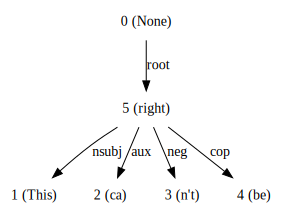

In [25]:
tree_list = list(dep_parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung:*


---

---
## Aufgabe 5f: 

In [26]:
sentence = "When the storm started, she was still outside."

In [27]:
aufgabe(blatt8_5f)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was für eine Satzkonstruktion liegt hier vor?</…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Welcher eingebettete Satztyp liegt vor?</h4>')…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Wie läßt sich dieser Satztyp klassifizieren?</…

### *Konstituentenanalyse:*

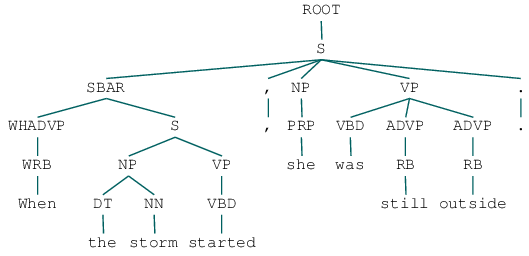

In [33]:
tree_list = list(parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Lösung:*

`S -> SBAR , NP VP .
SBAR -> WHADVP S`

`WHADVP -> WRB`

---
### *Dependenzanalyse:*

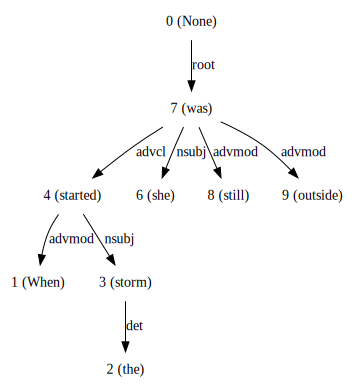

In [28]:
tree_list = list(dep_parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung:*


---

---
## Aufgabe 5g: 

In [29]:
sentence = "To go now would be a mistake."

In [30]:
aufgabe(blatt8_5g)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Was für eine Satzkonstruktion liegt hier vor?</…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Welcher eingebettete Satztyp liegt vor?</h4>')…

SelectionList(children=(HTML(value='<h4 style="font-size:14px;">Wie läßt sich dieser Satztyp klassifizieren?</…

### *Konstituentenanalyse:*

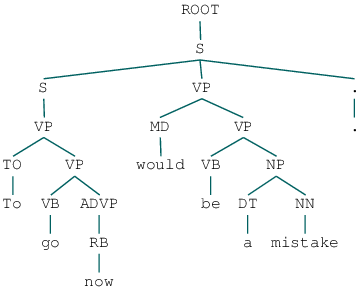

In [37]:
tree_list = list(parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Lösung:*

`S -> S VP .`

`VP -> MD VP`

---
### *Dependenzanalyse:*

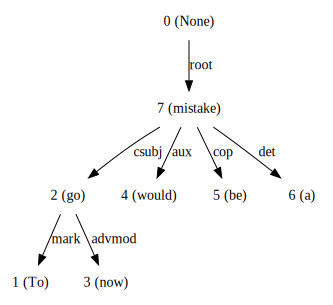

In [31]:
tree_list = list(dep_parser.raw_parse(sentence))
display(tree_list[0])

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung:*


---
# Hausaufgaben

---
## Aufgabe 6: Satzarten

#### Betrachten Sie die folgenden Beispielsätze. Um welche Satzart handelt es sich? (Aussagesatz, Fragesatz, Aufforderungssatz, Wunschsatz) Begründen Sie Ihre Entscheidung.

1. *Ich befehle, dass sofort alle Kriegshandlungen eingestellt werden.*
1. *Wo ist das Flugticket?*
1. *Ich habe dich gefragt, wo das Flugticket ist.*

#### Beantworten Sie zusätzlich noch die folgenden Fragen.

In [32]:
aufgabe(blatt8_6)

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welche Satzart handelt es sich bei Satz 1?</…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wieso?</h4>'), HTML(value='<i>Markieren Sie <…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welche Satzart handelt es sich bei Satz 2?</…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wieso?</h4>'), HTML(value='<i>Markieren Sie <…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Um welche Satzart handelt es sich bei Satz 3?</…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wieso?</h4>'), HTML(value='<i>Markieren Sie <…

---
## Aufgabe 7: Wortstellung im Nebensatz

#### Betrachten Sie die folgenden beiden Sätze:
- *Peter sagt, er habe kein Geld.*
- *Peter sagt, dass er kein Geld habe.*

#### Der erste Nebensatz  ist durch eine Konjunktion eingeleitet, der zweite Nebensatz ist ohne Einleitewort. Leiten Sie daraus eine Regularität zur Stellung des finiten Verbs im Nebensatz ab.

#### Füllen Sie zusätzlich den Lückentext aus:

In [33]:
aufgabe(blatt8_7)

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Wenn der Nebensatz durch eine Konjunktion ein…

SingleChoice(children=(HTML(value='<h4 style="font-size:14px;">Von welchem Satzteil wird diese Position gefüll…

MultipleChoice(children=(HTML(value='<h4 style="font-size:14px;">Kann diese Position theoretisch auch leer ble…